# Mod 4 Project - Starter Notebook

This notebook has been provided to you so that you can make use of the following starter code to help with the trickier parts of preprocessing the Zillow dataset. 

The notebook contains a rough outline the general order you'll likely want to take in this project. You'll notice that most of the areas are left blank. This is so that it's more obvious exactly when you should make use of the starter code provided for preprocessing. 

**_NOTE:_** The number of empty cells are not meant to infer how much or how little code should be involved in any given step--we've just provided a few for your convenience. Add, delete, and change things around in this notebook as needed!

# Some Notes Before Starting

This project will be one of the more challenging projects you complete in this program. This is because working with Time Series data is a bit different than working with regular datasets. In order to make this a bit less frustrating and help you understand what you need to do (and when you need to do it), we'll quickly review the dataset formats that you'll encounter in this project. 

## Wide Format vs Long Format

If you take a look at the format of the data in `zillow_data.csv`, you'll notice that the actual Time Series values are stored as separate columns. Here's a sample: 

<img src='~/../images/df_head.png'>

You'll notice that the first seven columns look like any other dataset you're used to working with. However, column 8 refers to the median housing sales values for April 1996, column 9 for May 1996, and so on. This This is called **_Wide Format_**, and it makes the dataframe intuitive and easy to read. However, there are problems with this format when it comes to actually learning from the data, because the data only makes sense if you know the name of the column that the data can be found it. Since column names are metadata, our algorithms will miss out on what dates each value is for. This means that before we pass this data to our ARIMA model, we'll need to reshape our dataset to **_Long Format_**. Reshaped into long format, the dataframe above would now look like:

<img src='~/../images/melted1.png'>

There are now many more rows in this dataset--one for each unique time and zipcode combination in the data! Once our dataset is in this format, we'll be able to train an ARIMA model on it. The method used to convert from Wide to Long is `pd.melt()`, and it is common to refer to our dataset as 'melted' after the transition to denote that it is in long format. 

# Helper Functions Provided

Melting a dataset can be tricky if you've never done it before, so you'll see that we have provided a sample function, `melt_data()`, to help you with this step below. Also provided is:

* `get_datetimes()`, a function to deal with converting the column values for datetimes as a pandas series of datetime objects
* Some good parameters for matplotlib to help make your visualizations more readable. 

Good luck!


# Step 1: Load the Data/Filtering for Chosen Zipcodes

# Mod 4 Project - Starter Notebook

This notebook has been provided to you so that you can make use of the following starter code to help with the trickier parts of preprocessing the Zillow dataset. 

The notebook contains a rough outline the general order you'll likely want to take in this project. You'll notice that most of the areas are left blank. This is so that it's more obvious exactly when you should make use of the starter code provided for preprocessing. 

**_NOTE:_** The number of empty cells are not meant to infer how much or how little code should be involved in any given step--we've just provided a few for your convenience. Add, delete, and change things around in this notebook as needed!

# Some Notes Before Starting

This project will be one of the more challenging projects you complete in this program. This is because working with Time Series data is a bit different than working with regular datasets. In order to make this a bit less frustrating and help you understand what you need to do (and when you need to do it), we'll quickly review the dataset formats that you'll encounter in this project. 

## Wide Format vs Long Format

If you take a look at the format of the data in `zillow_data.csv`, you'll notice that the actual Time Series values are stored as separate columns. Here's a sample: 

<img src='~/../images/df_head.png'>

You'll notice that the first seven columns look like any other dataset you're used to working with. However, column 8 refers to the median housing sales values for April 1996, column 9 for May 1996, and so on. This This is called **_Wide Format_**, and it makes the dataframe intuitive and easy to read. However, there are problems with this format when it comes to actually learning from the data, because the data only makes sense if you know the name of the column that the data can be found it. Since column names are metadata, our algorithms will miss out on what dates each value is for. This means that before we pass this data to our ARIMA model, we'll need to reshape our dataset to **_Long Format_**. Reshaped into long format, the dataframe above would now look like:

<img src='~/../images/melted1.png'>

There are now many more rows in this dataset--one for each unique time and zipcode combination in the data! Once our dataset is in this format, we'll be able to train an ARIMA model on it. The method used to convert from Wide to Long is `pd.melt()`, and it is common to refer to our dataset as 'melted' after the transition to denote that it is in long format. 

# Helper Functions Provided

Melting a dataset can be tricky if you've never done it before, so you'll see that we have provided a sample function, `melt_data()`, to help you with this step below. Also provided is:

* `get_datetimes()`, a function to deal with converting the column values for datetimes as a pandas series of datetime objects
* Some good parameters for matplotlib to help make your visualizations more readable. 

Good luck!


# Step 1: Load the Data/Filtering for Chosen Zipcodes

In [2]:
ls

 Volume in drive C is OS
 Volume Serial Number is D816-28B0

 Directory of C:\Users\luigi\FlatironSchool\Module04\Project_Mod_4\dsc-mod-4-project-online-ds-pt-051319

25/10/2019  12:26    <DIR>          .
25/10/2019  12:26    <DIR>          ..
24/10/2019  13:13                29 .gitignore
24/10/2019  13:16    <DIR>          .ipynb_checkpoints
24/10/2019  13:13                93 .learn
24/10/2019  13:13             1,849 CONTRIBUTING.md
24/10/2019  13:13    <DIR>          images
24/10/2019  13:13             1,371 LICENSE.md
25/10/2019  12:26            30,422 mod_4_starter_notebook.ipynb
24/10/2019  13:13            78,048 module4_project_rubric.pdf
24/10/2019  13:13             8,295 README.md
25/10/2019  12:23    <DIR>          starter_notebook
24/10/2019  13:13        26,312,281 zillow_data.csv
               8 File(s)     26,432,388 bytes
               5 Dir(s)  58,203,176,960 bytes free


In [55]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [4]:
df = pd.read_csv('zillow_data.csv')
df.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14723 entries, 0 to 14722
Columns: 272 entries, RegionID to 2018-04
dtypes: float64(219), int64(49), object(4)
memory usage: 30.6+ MB


In [6]:
df.drop('RegionID', axis=1, inplace=True)

In [7]:
df.drop('SizeRank', axis=1, inplace=True)

In [114]:
df[df['City'] == 'Kansas City'].shape

(37, 270)

# Step 2: Data Preprocessing

In [6]:
def get_datetimes(df):
    return pd.to_datetime(df.columns.values[1:], format='%Y-%m')

# Step 3: EDA and Visualization

In [ ]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)

# NOTE: if you visualizations are too cluttered to read, try calling 'plt.gcf().autofmt_xdate()'!

# Step 4: Reshape from Wide to Long Format

In [11]:
def melt_data(df):
    melted = pd.melt(df, id_vars=['RegionName', 'City', 'State', 'Metro', 'CountyName'], var_name='time')
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    return melted.groupby('time').aggregate({'value':'mean'})

In [12]:
melt_data(df)

,value
time,
1996-04-01,118299.123063
1996-05-01,118419.044139
1996-06-01,118537.423268
1996-07-01,118653.069278
1996-08-01,118780.254312
1996-09-01,118927.528500
1996-10-01,119120.520316
1996-11-01,119345.352236
1996-12-01,119685.084771


In [18]:
chicago = df[df['RegionName'] == 60657]
chicago

,RegionName,City,State,Metro,CountyName,1996-04,1996-05,1996-06,1996-07,1996-08,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,60657,Chicago,IL,Chicago,Cook,334200.0,335400.0,336500.0,337600.0,338500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600


In [58]:
chicago_time.describe()

,value
count,2.650000e+02
mean,7.439789e+05
std,1.908211e+05
min,3.342000e+05
25%,6.734000e+05
50%,7.756000e+05
75%,8.899000e+05
max,1.033800e+06


In [20]:
chicago_time = melt_data(chicago)

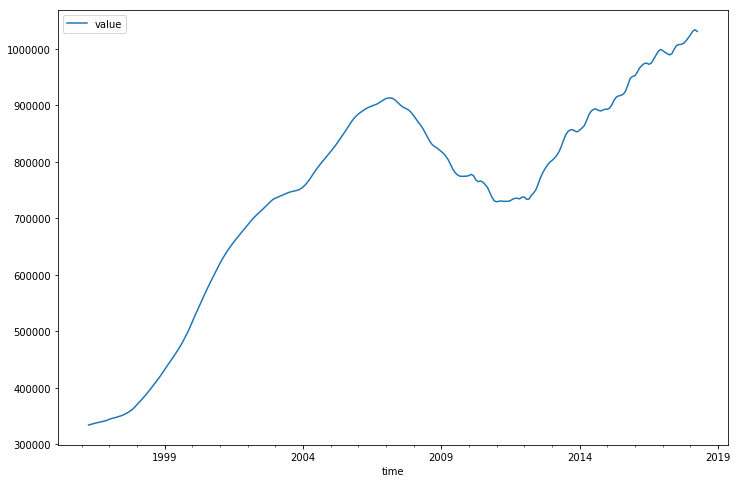

In [25]:
chicago_time.plot(figsize=(12,8));

In [63]:
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()

    #Plot rolling statistics:
    plt.figure(figsize=(12,8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

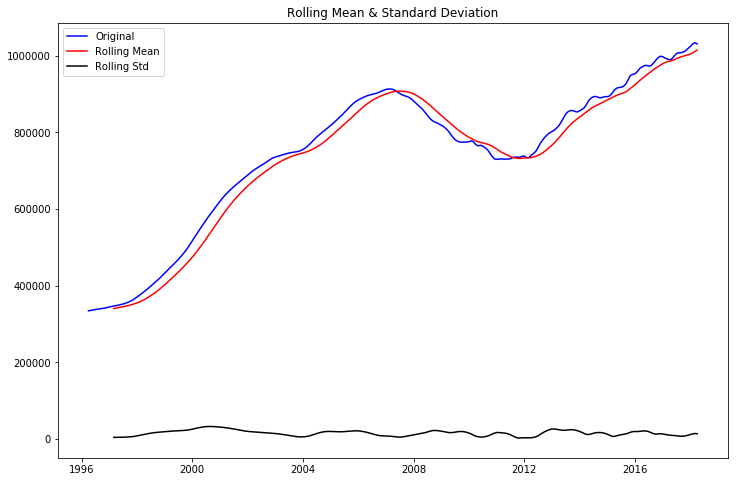

In [64]:
test_stationarity(chicago_time)

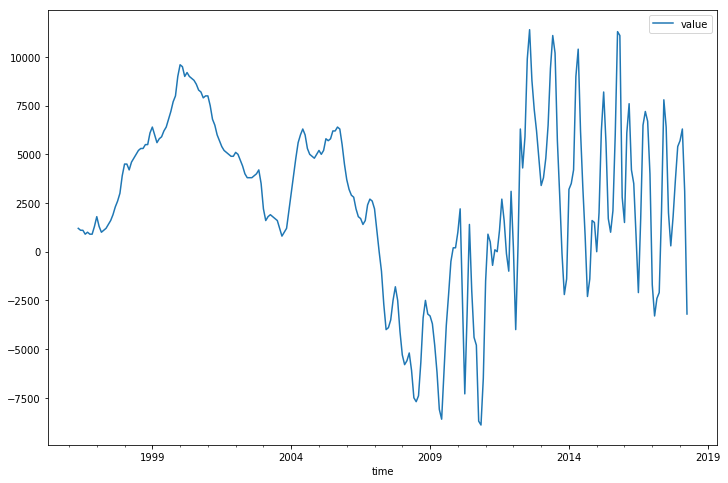

In [65]:
chicago_diff = chicago_time.diff()
chicago_diff.plot(figsize=(12,8));

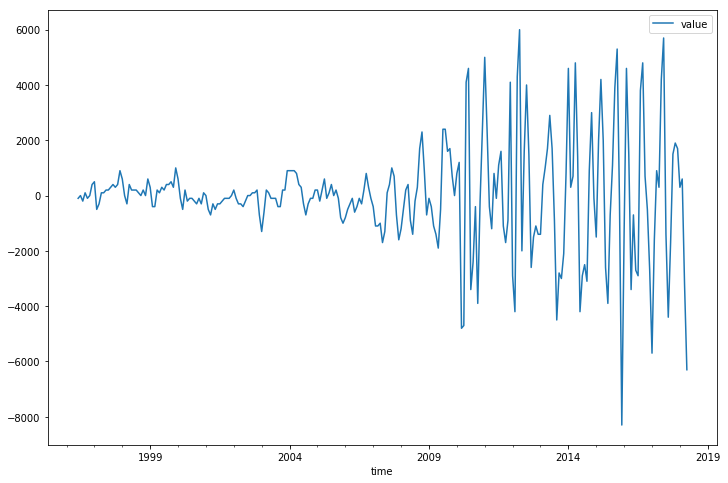

In [66]:
chicago_diff1 = chicago_diff.diff()
chicago_diff1.plot(figsize=(12,8));

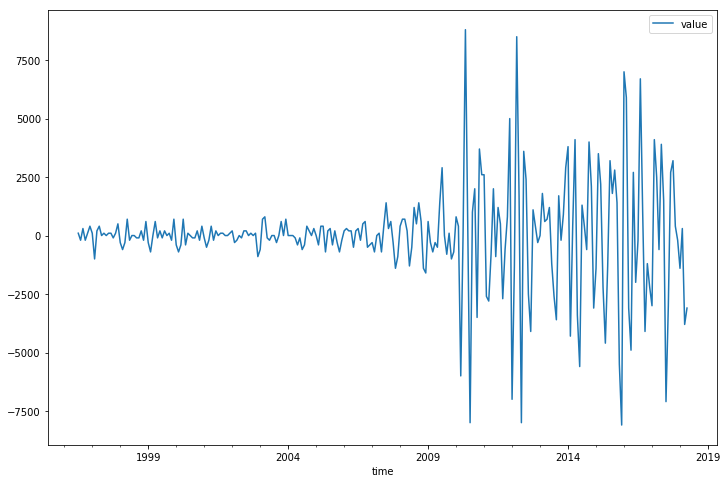

In [67]:
chicago_diff2 = chicago_diff1.diff()
chicago_diff2.plot(figsize=(12,8));

In [95]:
chicago_2009_onwards = chicago_time['2009': '2018']
print(chicago_2009_onwards.head())

               value
time                
2009-01-01  818300.0
2009-02-01  814600.0
2009-03-01  809800.0
2009-04-01  803600.0
2009-05-01  795500.0


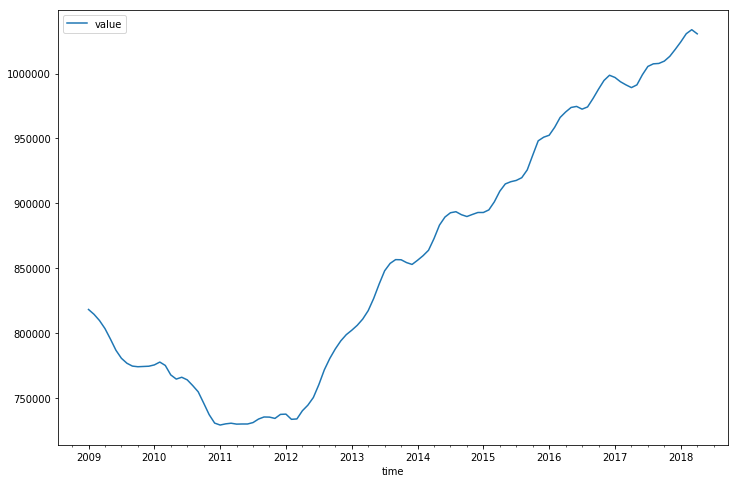

In [96]:
chicago_2009_onwards.plot(figsize=(12,8))

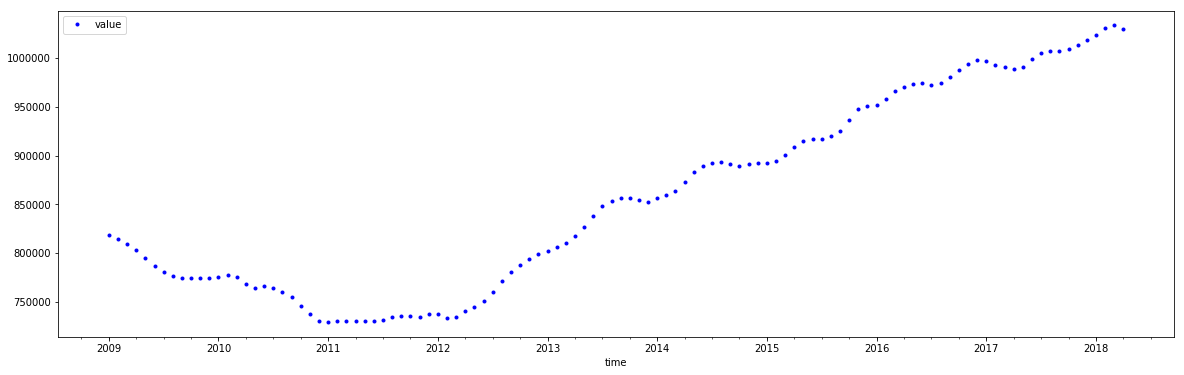

In [97]:
chicago_2009_onwards.plot(figsize = (20,6), style = ".b");

In [98]:
year_groups = chicago_2009_onwards.groupby(pd.Grouper(freq ='A'))

In [99]:
len(year_groups)

10

In [100]:
for yr, group in year_groups:
    print(group.values.ravel())
    

[818300. 814600. 809800. 803600. 795500. 786900. 780700. 776900. 774700.
 774200. 774400. 774600.]
[775600. 777800. 775200. 767900. 764700. 766100. 764100. 759700. 754900.
 746200. 737300. 730800.]
[729300. 730200. 730700. 730000. 730100. 730100. 731200. 733900. 735500.
 735400. 734400. 737500.]
[737700. 733700. 734000. 740300. 744600. 750500. 760400. 771800. 780600.
 787900. 794100. 798900.]
[802300. 806100. 810900. 817400. 826800. 837900. 848100. 853800. 856700.
 856600. 854400. 853000.]
[856200. 859700. 863900. 872900. 883300. 889500. 892800. 893600. 891300.
 889900. 891500. 893000.]
[893000. 895000. 901200. 909400. 915000. 916700. 917700. 919800. 925800.
 937100. 948200. 951000.]
[952500. 958600. 966200. 970400. 973900. 974700. 972600. 974300. 980800.
 988000. 994700. 998700.]
[ 997000.  993700.  991300.  989200.  991300.  999100. 1005500. 1007500.
 1007800. 1009600. 1013300. 1018700.]
[1024400. 1030700. 1033800. 1030600.]


In [101]:
chicago_annual

,2009-12-31 00:00:00,2010-12-31 00:00:00,2011-12-31 00:00:00,2012-12-31 00:00:00,2013-12-31 00:00:00,2014-12-31 00:00:00,2015-12-31 00:00:00,2016-12-31 00:00:00,2017-12-31 00:00:00
0,818300.0,775600.0,729300.0,737700.0,802300.0,856200.0,893000.0,952500.0,997000.0
1,814600.0,777800.0,730200.0,733700.0,806100.0,859700.0,895000.0,958600.0,993700.0
2,809800.0,775200.0,730700.0,734000.0,810900.0,863900.0,901200.0,966200.0,991300.0
3,803600.0,767900.0,730000.0,740300.0,817400.0,872900.0,909400.0,970400.0,989200.0
4,795500.0,764700.0,730100.0,744600.0,826800.0,883300.0,915000.0,973900.0,991300.0
5,786900.0,766100.0,730100.0,750500.0,837900.0,889500.0,916700.0,974700.0,999100.0
6,780700.0,764100.0,731200.0,760400.0,848100.0,892800.0,917700.0,972600.0,1005500.0
7,776900.0,759700.0,733900.0,771800.0,853800.0,893600.0,919800.0,974300.0,1007500.0
8,774700.0,754900.0,735500.0,780600.0,856700.0,891300.0,925800.0,980800.0,1007800.0
9,774200.0,746200.0,735400.0,787900.0,856600.0,889900.0,937100.0,988000.0,1009600.0


In [103]:
chicago_2009_onwards.head()

,value
time,
2009-01-01,818300.0
2009-02-01,814600.0
2009-03-01,809800.0
2009-04-01,803600.0
2009-05-01,795500.0


In [104]:
chicago_2009_onwards['Month'] = chicago_2009_onwards.index.month

In [105]:
chicago_2009_onwards.head()

,value,Month
time,,
2009-01-01,818300.0,1
2009-02-01,814600.0,2
2009-03-01,809800.0,3
2009-04-01,803600.0,4
2009-05-01,795500.0,5


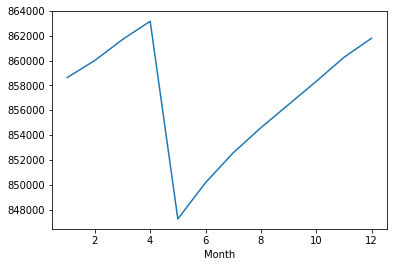

In [107]:
chicago_2009_onwards.groupby('Month')['value'].mean().plot(kind='line')

In [102]:
chicago_annual = pd.DataFrame()

for yr, group in year_groups:
    print(yr)
    chicago_annual[yr] = group.values.ravel()
    
# Plot the yearly groups as subplots
chicago_annual.plot(figsize = (13,8), subplots=True, legend=True);

2009-12-31 00:00:00
2010-12-31 00:00:00
2011-12-31 00:00:00
2012-12-31 00:00:00
2013-12-31 00:00:00
2014-12-31 00:00:00
2015-12-31 00:00:00
2016-12-31 00:00:00
2017-12-31 00:00:00
2018-12-31 00:00:00


ValueError: Length of values does not match length of index

# Step 5: ARIMA Modeling

In [57]:
# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
	# prepare training dataset
	train_size = int(len(X) * 0.66)
	train, test = X[0:train_size], X[train_size:]
	history = [x for x in train]
	# make predictions
	predictions = list()
	for t in range(len(test)):
		model = ARIMA(history, order=arima_order)
		model_fit = model.fit(disp=0)
		yhat = model_fit.forecast()[0]
		predictions.append(yhat)
		history.append(test[t])
	# calculate out of sample error
	error = mean_squared_error(test, predictions)
	return error
 
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
	dataset = dataset.astype('float32')
	best_score, best_cfg = float("inf"), None
	for p in p_values:
		for d in d_values:
			for q in q_values:
				order = (p,d,q)
				try:
					mse = evaluate_arima_model(dataset, order)
					if mse < best_score:
						best_score, best_cfg = mse, order
					print('ARIMA%s MSE=%.3f' % (order,mse))
				except:
					continue
	print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))
 
series = chicago_time
# evaluate parameters
p_values = [0, 1, 2, 4, 6, 8, 10]
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
evaluate_models(series.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) MSE=36487470764.546
ARIMA(0, 0, 1) MSE=9292534789.705
ARIMA(0, 1, 0) MSE=18665615.571
ARIMA(0, 1, 1) MSE=7166744.523
ARIMA(0, 2, 0) MSE=8693152.184
ARIMA(0, 2, 1) MSE=6101445.234
ARIMA(1, 0, 0) MSE=27477596.753
ARIMA(1, 1, 0) MSE=8217863.785
ARIMA(1, 2, 0) MSE=7800094.038
ARIMA(2, 1, 0) MSE=6898943.277
ARIMA(2, 2, 0) MSE=6014289.650
ARIMA(4, 0, 2) MSE=4874638.923
ARIMA(4, 1, 0) MSE=5608177.575
ARIMA(4, 1, 1) MSE=5401108.662
ARIMA(4, 2, 0) MSE=4961439.442
ARIMA(4, 2, 1) MSE=5007997.730
ARIMA(6, 1, 1) MSE=4772634.151
ARIMA(6, 2, 0) MSE=5132366.947
ARIMA(6, 2, 1) MSE=5050664.926
Best ARIMA(6, 1, 1) MSE=4772634.151


# Step 2: Data Preprocessing

In [ ]:
def get_datetimes(df):
    return pd.to_datetime(df.columns.values[1:], format='%Y-%m')

# Step 3: EDA and Visualization

In [ ]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)

# NOTE: if you visualizations are too cluttered to read, try calling 'plt.gcf().autofmt_xdate()'!

# Step 4: Reshape from Wide to Long Format

In [ ]:
def melt_data(df):
    melted = pd.melt(df, id_vars=['RegionName', 'City', 'State', 'Metro', 'CountyName'], var_name='time')
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    return melted.groupby('time').aggregate({'value':'mean'})

# Step 5: ARIMA Modeling

# Step 6: Interpreting Results